In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nassimsfaxi_observation_de_maladie_path = kagglehub.dataset_download('nassimsfaxi/observation-de-maladie')

print('Data source import complete.')

100%|██████████| 164k/164k [00:00<00:00, 57.4MB/s]

Extracting files...
Data source import complete.


<div style="border: 2px solid #8B0000; padding: 20px; border-radius: 10px; background-color: #white;">
    <h1 style="text-align: center; color: #8B0000; font-family: 'Georgia', serif; font-size: 36px;">Disease Classification Observation</h1>
    <h6 style="text-align: center; color: #8B0000; font-family: 'Georgia', serif; font-size: 28px;">By Brahim ET-TANANY</h6>
<\div>


<div style="border: 2px solid #228B22; padding: 20px; border-radius: 10px; background-color: #F0FFF0;">
    <h2 style="color: #228B22; font-family: 'Verdana', sans-serif; font-size: 24px;">About the Dataset</h2>
    <p style="font-family: 'Calibri', sans-serif; font-size: 18px; color: #2F4F4F;">This dataset contains real observations of symptoms and medical conditions of individuals, whether related to the flu, COVID-19, respiratory conditions, or any typical illness.</p>
    <p style="font-family: 'Calibri', sans-serif; font-size: 18px; color: #2F4F4F;">We measured their temperature, heart rate, oxygen level, blood sugar, and blood pressure to assess their health status.</p>
    <p style="font-family: 'Calibri', sans-serif; font-size: 18px; color: #2F4F4F;">The "label" column indicates the person's condition, where "1" might represent a sick state and "0" a healthy state.</p>
</div>

***

<div style="border: 2px solid #4B0082; padding: 20px; border-radius: 10px; background-color: #E6E6FA;">
    <h2 style="color: #4B0082; font-family: 'Tahoma', sans-serif; font-size: 24px;">Table of Contents</h2>
    <ol style="font-family: 'Trebuchet MS', sans-serif; font-size: 18px; color: #4B0082;">
        <li><a href="#importing-libraries" style="color: #4B0082;">Importing Libraries</a></li>
        <li><a href="#importing-data" style="color: #4B0082;">Importing Data</a></li>
        <li><a href="#exploratory-data-analysis" style="color: #4B0082;">Exploratory Data Analysis</a></li>
        <li><a href="#train-test-split" style="color: #4B0082;">Train-Test Split</a></li>
        <li><a href="#model-training" style="color: #4B0082;">Model Training</a></li>
        <li><a href="#model-evaluation" style="color: #4B0082;">Model Evaluation</a></li>
    </ol>
</div>




<div style="padding: 20px; background-color: white; border-radius: 15px; border: 2px solid #004080;">
    <h2 style="color: #004080; font-family: 'Arial', sans-serif; font-size: 28px; text-align: center; text-shadow: 1px 1px 2px #000000;">Mathematical Explanation of Logistic Regression</h2>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        Logistic regression is a classification method used to predict the probability that an observation belongs to a particular class. The model is based on the sigmoid function, defined by:
    </p>
    <p style="font-family: 'Courier New', Courier, monospace; font-size: 22px; color: blue; text-align: center;">
        $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
    </p>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        Where $z$ is a linear combination of the features. In logistic regression, $z$ is given by:
    </p>
    <p style="font-family: 'Courier New', Courier, monospace; font-size: 22px; color: blue; text-align: center;">
        $$ z = w_1 x_1 + w_2 x_2 + b $$
    </p>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        Here:
    </p>
    <ul style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        <li>$x_1$ and $x_2$ are the features.</li>
        <li>$w_1$ and $w_2$ are the coefficients (or weights).</li>
        <li>$b$ is the bias (intercept).</li>
    </ul>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        The probability that observation $X$ belongs to the positive class (e.g., $y=1$) is:
    </p>
    <p style="font-family: 'Courier New', Courier, monospace; font-size: 22px; color: blue; text-align: center;">
        $$ P(y=1|X) = \frac{1}{1 + e^{-(w_1 x_1 + w_2 x_2 + b)}} $$
    </p>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        This formula calculates the probability by applying the sigmoid function to the linear combination $w_1 x_1 + w_2 x_2 + b$. The model adjusts the coefficients $w_1$, $w_2$, and the bias $b$ to maximize the probability of observing the actual classes from the training data.
    </p>
    <div style="text-align: center;">
        <img src="https://miro.medium.com/freeze/max/640/1*CYAn9ACXrWX3IneHSoMVOQ.gif" alt="Sigmoid Function" style="max-width: 60%; border: 2px solid #004080; border-radius: 10px;">
    </div>
    <h3 style="color: #004080; font-family: 'Arial', sans-serif; font-size: 24px; text-align: center; margin-top: 30px;">Gradient Descent</h3>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        To find the optimal values of $w_1$, $w_2$, and $b$, we use the gradient descent method. This method adjusts the parameters to minimize a cost function, typically the negative log-likelihood in logistic regression.
    </p>
    <div style="text-align: center;">
        <img src="https://qiita-image-store.s3.amazonaws.com/0/130771/695f690f-d3a2-5ba3-97ef-e3140af521e1.png" alt="Gradient Descent" style="max-width: 60%; border: 2px solid #004080; border-radius: 10px;">
    </div>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        The parameter update rule is:
    </p>
    <p style="font-family: 'Courier New', Courier, monospace; font-size: 22px; color: blue; text-align: center;">
        $$ w_i \leftarrow w_i - \alpha \frac{\partial L}{\partial w_i} $$
        $$ b \leftarrow b - \alpha \frac{\partial L}{\partial b} $$
    </p>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        Where $\alpha$ is the learning rate and $L$ is the cost function.
    </p>
    <h3 style="color: #004080; font-family: 'Arial', sans-serif; font-size: 24px; text-align: center; margin-top: 30px;">Class Separation</h3>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        Logistic regression finds a decision boundary that separates the classes. This boundary is a line (in 2D) or a hyperplane (in higher dimensions) where the probability of each class is equal to 0.5.
    </p>
    <div style="text-align: center;">
        <img src="https://staff.fnwi.uva.nl/a.visser/activities/MachineLearningForRescue/slides/images/perceptron.gif" alt="Decision Boundary" style="max-width: 60%; border: 2px solid #004080; border-radius: 10px;">
    </div>
    <p style="font-family: 'Times New Roman', serif; font-size: 18px; color: #333333;">
        In other words, the model adjusts the coefficients so that the class separation line is optimally placed relative to the training data.
    </p>
</div>


<div style="border: 2px dashed #004080; padding: 20px; border-radius: 15px; background-color: #g0f7ff; box-shadow: 0px 0px 10px #aaaaaa;">
    <h2 style="color: #brown; font-family: 'Georgia', serif; font-size: 26px; text-align: center;"> Importing Libraries</h2>
   
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import os
plt.style.use('ggplot')

<div style="border: 2px dashed #004080; padding: 20px; border-radius: 15px; background-color: #g0f7ff; box-shadow: 0px 0px 10px #aaaaaa;">
    <h2 style="color: #brown; font-family: 'Georgia', serif; font-size: 26px; text-align: center;"> Importing Data</h2>
   
</div>

In [ ]:
file_path = os.path.join(nassimsfaxi_observation_de_maladie_path, 'maladie_observations.csv')
data = pd.read_csv(file_path)

<div style="border: 2px dashed #004080; padding: 20px; border-radius: 15px; background-color: #g0f7ff; box-shadow: 0px 0px 10px #aaaaaa;">
    <h2 style="color: #brown; font-family: 'Georgia', serif; font-size: 26px; text-align: center;"> Exploratory Data Analysis </h2>
   
</div>

In [ ]:
data.sample(5)

In [ ]:
data.shape

In [ ]:
data.groupby('label').label.value_counts()

In [ ]:
sns.heatmap(data.corr().abs(),cmap='magma',annot=True)

In [ ]:
data.shape

In [ ]:
data.isna().sum()

In [ ]:
data.temperature.describe()

In [ ]:
median_temp=data[data['temperature']<100].temperature.median()
data['temperature']=data['temperature'].apply(lambda x: median_temp if x >100 else x)

In [ ]:
data.temperature.describe()

In [ ]:
mean_temp = data['temperature'].mean()
data['temperature'] = data['temperature'].fillna(mean_temp)

In [ ]:
data.sample(5)

In [ ]:
sns.barplot(data,x='label',y='temperature',palette=['red','blue'])

In [ ]:
sns.violinplot(data,x='label',y='temperature')

In [ ]:
data.pouls.describe()

In [ ]:
data[data['pouls']>120].shape

In [ ]:
median_pouls=data[data.pouls<120].pouls.median()
data['pouls']=data['pouls'].apply(lambda x : median_pouls if x>120 else x)

In [ ]:
sns.barplot(data,x='label',y='pouls',palette=['yellow','orange'])

In [ ]:
sns.violinplot(data,x='label',y='pouls',palette='Greens')

In [ ]:
data.sample(2)

In [ ]:
mean_pouls = data['pouls'].mean()
data['pouls']=data['pouls'].fillna(mean_pouls)

In [ ]:
sns.scatterplot( data,x='temperature', y='pouls', hue='label')

In [ ]:
data['oxygene'].describe()

In [ ]:
mean_oxygene=data['oxygene'].mean()
data['oxygene']=data['oxygene'].fillna(mean_oxygene)

In [ ]:
median_oxygene=data[data['oxygene']<100].oxygene.median()
data['oxygene']=data['oxygene'].apply(lambda x : median_oxygene if x>100 else x)

In [ ]:
sns.scatterplot(data,x='temperature',y='oxygene',hue='label',alpha=0.2)

In [ ]:
sns.barplot(data,x='label',y='oxygene',palette=['violet','cyan'])

In [ ]:
sns.violinplot(data,x='label',y='oxygene',palette='Blues')

In [ ]:
data.isna().sum()

In [ ]:
data.sample(2)

In [ ]:
data.glycemie.describe()

In [ ]:
sns.boxplot(data,x='label',y='glycemie')

In [ ]:
sns.violinplot(data,x='label',y='glycemie')

In [ ]:
stats_label_1 = data[data.label == 1]['glycemie'].describe()
stats_label_0 = data[data.label == 0]['glycemie'].describe()

print("Stats for label 1:")
print(stats_label_1)

print("\nStats for label 0:")
print(stats_label_0)

In [ ]:
data=data.drop(columns='glycemie')

In [ ]:
data.tension.describe()

In [ ]:
sns.boxplot(data,x='label',y='tension')

In [ ]:
sns.violinplot(data,x='label',y='tension')

In [ ]:
data.sample(5)

<div style="border: 2px dashed #004080; padding: 20px; border-radius: 15px; background-color: #g0f7ff; box-shadow: 0px 0px 10px #aaaaaa;">
    <h2 style="color: #brown; font-family: 'Georgia', serif; font-size: 26px; text-align: center;"> Train-Test-Split</h2>
   
</div>

In [ ]:
Y=data['label']
X=data.drop(columns='label')

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=75)

<div style="border: 2px dashed #004080; padding: 20px; border-radius: 15px; background-color: #g0f7ff; box-shadow: 0px 0px 10px #aaaaaa;">
    <h2 style="color: #brown; font-family: 'Georgia', serif; font-size: 26px; text-align: center;"> Model Training </h2>
   
</div>

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

In [ ]:
y_pred=model.predict(X_test)

<div style="border: 2px dashed #004080; padding: 20px; border-radius: 15px; background-color: #g0f7ff; box-shadow: 0px 0px 10px #aaaaaa;">
    <h2 style="color: #brown; font-family: 'Georgia', serif; font-size: 26px; text-align: center;"> Model Evaluation</h2>
   
</div>

In [ ]:
accuracy_score(Y_test,y_pred)

In [ ]:
sns.heatmap(confusion_matrix(Y_test,y_pred),cmap='summer',annot=True)

<div style="padding: 20px; background-color: #f0f8ff; border-radius: 15px; border: 2px solid #4682b4;">
    <h2 style="color: #4682b4; font-family: 'Arial', sans-serif; font-size: 28px; text-align: center; text-shadow: 1px 1px 2px #000080;">
        Thank You!
    </h2>
    <p style="font-family: 'Georgia', serif; font-size: 18px; color: #333333;">
        Your feedback is incredibly valuable to us. We appreciate your time and effort in reviewing our work.
        <br><br>
        Please feel free to leave your comments and suggestions below.
    </p>
    
   
</div>


100%|██████████| 164k/164k [00:00<00:00, 46.7MB/s]

Extracting files...


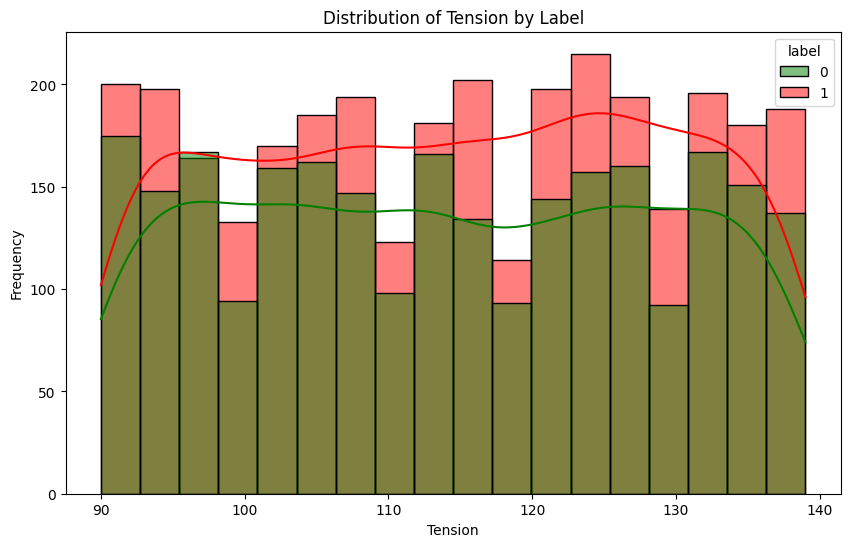

In [5]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and preprocessing to ensure 'data' is defined
nassimsfaxi_observation_de_maladie_path = kagglehub.dataset_download('nassimsfaxi/observation-de-maladie')
file_path = os.path.join(nassimsfaxi_observation_de_maladie_path, 'maladie_observations.csv')
data = pd.read_csv(file_path)

median_temp=data[data['temperature']<100].temperature.median()
data['temperature']=data['temperature'].apply(lambda x: median_temp if x >100 else x)
mean_temp = data['temperature'].mean()
data['temperature'] = data['temperature'].fillna(mean_temp)

median_pouls=data[data.pouls<120].pouls.median()
data['pouls']=data['pouls'].apply(lambda x : median_pouls if x>120 else x)
mean_pouls = data['pouls'].mean()
data['pouls']=data['pouls'].fillna(mean_pouls)

mean_oxygene=data['oxygene'].mean()
data['oxygene']=data['oxygene'].fillna(mean_oxygene)
median_oxygene=data[data['oxygene']<100].oxygene.median()
data['oxygene']=data['oxygene'].apply(lambda x : median_oxygene if x>100 else x)

data=data.drop(columns='glycemie')

# Original plotting code
plt.figure(figsize=(10, 6))
sns.histplot(data, x='tension', hue='label', kde=True, palette=['green', 'red'])
plt.title('Distribution of Tension by Label')
plt.xlabel('Tension')
plt.ylabel('Frequency')
plt.show()

In [4]:
import seaborn as sns
sns.pairplot(data, hue='label', palette=['green', 'red'], diag_kind='kde')

NameError: name 'data' is not defined